# **Sales Analysis Project**



Import Libraries



In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import statistics as st
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt

Load the dataset

In [ ]:
# The dataset file is Excel extention. So, I use the read_excel to read Excel file
data = pd.read_excel('/content/Sales_analysis.xlsx')

In [ ]:
# To see the first 5 rows in the dataset
data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


## **1. Data Wrangling**



**1: Ensure that the data is clean and that there is no missing or incorrect data.**


*   **Inspect the data manually for missing/incorrect data using the functions isna(), and notna().**








In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [ ]:
# Check if the data has a null values
data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [ ]:
# Check if the data has a not null values
data.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [ ]:
# Return the unique values from the dataset
data.nunique()

Date     90
Time      3
State     7
Group     4
Unit     64
Sales    64
dtype: int64

In [ ]:
# Return the columns labels
data.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [ ]:
# Return the number of rows and columns in the data set
# Rows = 7560 & Columns = 6
data.shape

(7560, 6)

**2: Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data.**
*   **(dropping the null values or filling them).**

If the dataset has missing data or incorrect data we can drop the columns or filling them by calculate the average and fill the missing or incorrect data with it. It depends on the dataset type and how important does the dataset.

**3: Select an appropriate Data Wrangling approach —  data standardization or data normalization.**
*   **Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)**


In [ ]:
# Normalize the data columns unit and sales using the min-max method
data_normaliz = data[['Unit','Sales']].copy()

# apply normalization techniques
for column in data_normaliz.columns:
  data_normaliz[column] = (data_normaliz[column] - data_normaliz[column].min()) / (data_normaliz[column].max() - data_normaliz[column].min())

# view normalized data
print(data_normaliz)

          Unit     Sales
0     0.095238  0.095238
1     0.095238  0.095238
2     0.031746  0.031746
3     0.206349  0.206349
4     0.015873  0.015873
...        ...       ...
7555  0.190476  0.190476
7556  0.206349  0.206349
7557  0.206349  0.206349
7558  0.142857  0.142857
7559  0.174603  0.174603

[7560 rows x 2 columns]


**4: Share your recommendation on the usage of the *groupby()* function for data chunking or merging.**

We can use groupby() function to split the data into groups based on some criteria. like in this example I count the number of each group in the dataset

In [ ]:
print(data.groupby('Group').count())

          Date  Time  State  Unit  Sales
Group                                   
 Kids     1890  1890   1890  1890   1890
 Men      1890  1890   1890  1890   1890
 Seniors  1890  1890   1890  1890   1890
 Women    1890  1890   1890  1890   1890


## **2.	Data Analysis**

**1:	Perform descriptive statistical analysis on the data (Sales and Unit columns)**

*  **(Techniques such as mean, median, mode and standard deviation can be used.).**



In this task as beginners we will use the long way to perform this task. But there is a shorter way to found the requestd values.

In [ ]:
# View the data statistics
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [ ]:
sdf = data['Sales']
print('The Mean of The Sales:', st.mean(sdf))
print('The Median of The Sales:', st.median(sdf))
print('The Mode of The Sales:', st.mode(sdf))
print('The Standard Deviation of The Sales:',st.stdev(sdf))

The Mean of The Sales: 45013.5582010582
The Median of The Sales: 35000.0
The Mode of The Sales: 22500
The Standard Deviation of The Sales: 32253.506943966073


In [ ]:
udf = data['Unit']
print('The Mean of The Unit:', st.mean(udf))
print('The Median of The Unit:', st.median(udf))
print('The Mode of The Unit:', st.mode(udf))
print('The Standard Deviation of The Unit:',st.stdev(udf))

The Mean of The Unit: 18.00542328042328
The Median of The Unit: 14.0
The Mode of The Unit: 9
The Standard Deviation of The Unit: 12.901402777586428


<ipython-input-50-642191cbf2e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.Sales, bins=50, kde=True, )


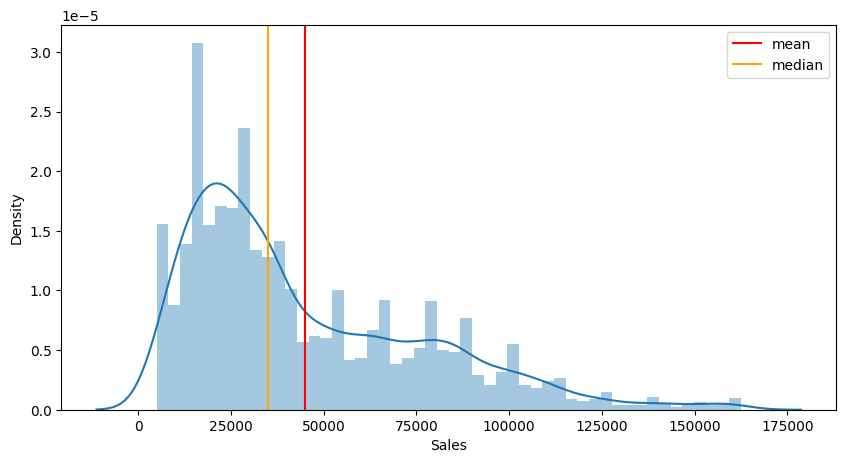

In [ ]:
# Sales distribution
fig = plt.figure(figsize = (10, 5))
ax = sns.distplot(data.Sales, bins=50, kde=True, )
plt.axvline(x=np.mean(data.Sales), color='red', label='mean')
plt.axvline(x=np.median(data.Sales), color='orange',label='median')
plt.legend(loc='upper right')
plt.show()

**2: Determine which group is generating the highest sales, and which group is generating the lowest sales.**




In [ ]:
# Print the sum of sales for each group
print(data.groupby('Group')['Sales'].sum())

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64


In [ ]:
# Print the highest and the lowest sales for groups
dgm = data.groupby('Group')['Sales'].sum()
print('The Group With Highest Sales is:',dgm.idxmax() , '=',dgm.max())
print('The Group With Lowest Sales:',dgm.idxmin(), '=',dgm.min())

The Group With Highest Sales is:  Men = 85750000
The Group With Lowest Sales:  Seniors = 84037500


**3: Determine which state is generating the highest sales, and which state is generating the lowest sales.**

In [ ]:
# Print the sum of sales for each state
print(data.groupby('State')['Sales'].sum())

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64


In [ ]:
# Print the highest and the lowest sales for states
dgm2 = data.groupby('State')['Sales'].sum()
print('The State With Highest Sales is:',dgm2.idxmax() , '=',dgm2.max())
print('The State With Lowest Sales:',dgm2.idxmin(), '=',dgm2.min())


The State With Highest Sales is:  VIC = 105565000
The State With Lowest Sales:  WA = 22152500


**4: Generate weekly, monthly and quarterly reports for the analysis made.**

*   **(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)**



In [ ]:
# Add two columns week and month in the dataframe
data['Week']= data.Date.apply(lambda x: x.week)
data['Month']= data.Date.apply(lambda x: x.month)
data['quarter']= data.Date.apply(lambda x: x.quarter)
data.head()

,Date,Time,State,Group,Unit,Sales,Week,Month,quarter
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,4
1,2020-10-01,Morning,WA,Men,8,20000,40,10,4
2,2020-10-01,Morning,WA,Women,4,10000,40,10,4
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,4


In [ ]:
# Group each week sales and sum them for the week sales report
w = data.groupby("Week")["Sales"].sum().reset_index().sort_values(by='Sales',ascending=False)
cw = w['Week']
sw = w['Sales']
print('The Sales Report for each Week is:')
print(w)

The Sales Report for each Week is:
    Week     Sales
12    52  31770000
11    51  31655000
10    50  31525000
9     49  29622500
1     41  27002500
3     43  26815000
2     42  26640000
4     44  21807500
8     48  21477500
6     46  21172500
7     47  21112500
5     45  20865000
0     40  15045000
13    53  13792500


In [ ]:
# Group each month sales and sum them for the month sales report
m = data.groupby("Month")["Sales"].sum().reset_index().sort_values(by='Sales',ascending=False)
cm = m['Month']
sm = m['Sales']
print('The Sales Report for each Month is:')
print(m)

The Sales Report for each Month is:
   Month      Sales
2     12  135330000
0     10  114290000
1     11   90682500


In [ ]:
# Sum all the months sales for the quarter sales report
q = data.groupby('quarter')['Sales'].sum().reset_index().sort_values(by='quarter',ascending=True)
cq = q['quarter']
sq = q['Sales']
print('The Quarter Sales Report is:',q['Sales'].sum())

The Quarter Sales Report is: 340302500


## **3. Data Visulaization**

**1: Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like**

**1.1: State-wise sales analysis for different groups (kids, women, men, and seniors).**

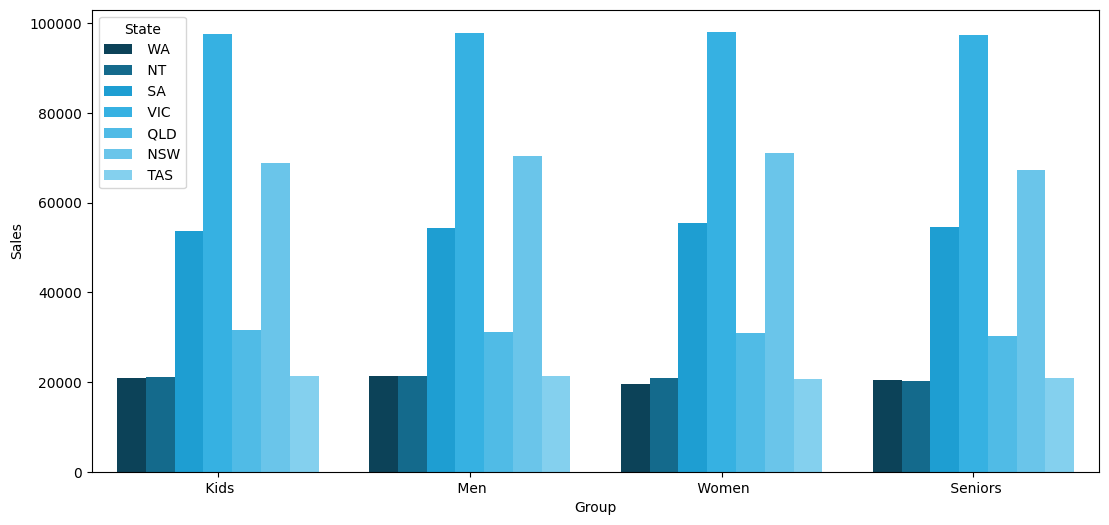

In [ ]:
c = ['#004764','#0072A0','#00ABF0', '#19BDFF', '#37C6FF','#55CEFF','#73D7FF']
plt.figure(figsize=(13, 6))
sns.barplot(y='Sales',x='Group',hue='State',data=data,palette=c, errorbar = None);

**1.2: Group-wise sales analysis (kids, women, men, and seniors) across different states.**

<Axes: xlabel='State', ylabel='Sales'>

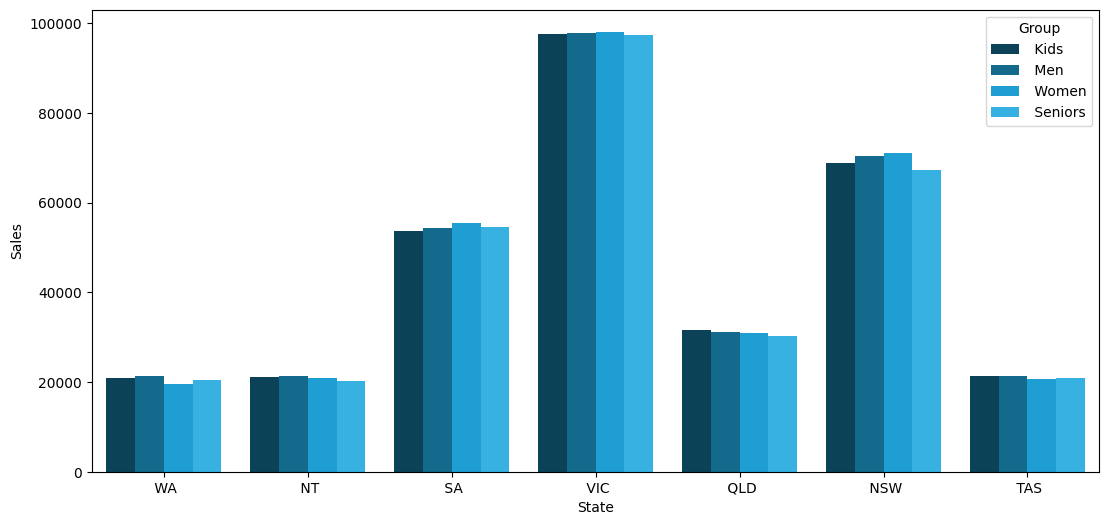

In [ ]:
c = ['#004764','#0072A0','#00ABF0', '#19BDFF']
plt.figure(figsize=(13, 6))
sns.barplot(y='Sales',x='State',hue='Group',data=data,palette=c, errorbar = None)

**1.3: Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?**
*   **[This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].**



In [ ]:
d2 = data.groupby('Time')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=True)
dt = d2['Time']
ds = d2['Sales']
d2

,Time,Sales
1,Evening,112087500
0,Afternoon,114007500
2,Morning,114207500


<Axes: xlabel='Time', ylabel='Sales'>

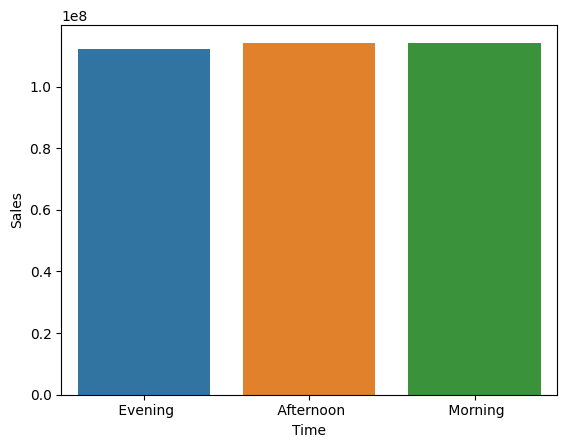

In [ ]:
# To visulaize the time-of-the-day report
# You can notice that there's no difference between the bars but in the Evening Time bar has some difference because it's shorter then the rest.
sns.barplot(x = dt,y= ds)

([<matplotlib.patches.Wedge at 0x7fa353ca4b50>,
 [Text(0.5618004505587912, 0.9457167936290121, 'Afternon'),
  Text(-1.0997893316606189, 0.021527330663353713, 'Evening Time'),
  Text(0.5431847153557433, -0.9565303785055131, 'Morning')],
 [Text(0.3064366093957043, 0.5158455237976429, '33%'),
  Text(-0.5998850899967012, 0.011742180361829297, '34%'),
  Text(0.2962825720122236, -0.5217438428211889, '34%')])

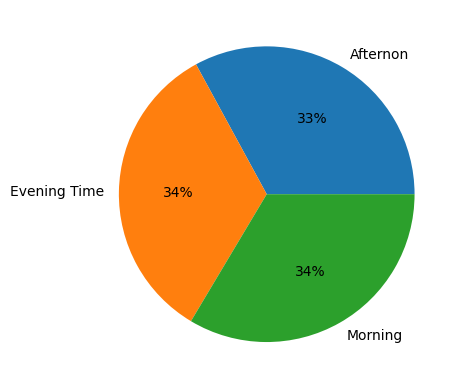

In [ ]:
# To visulaize the time-of-the-day report
# You can notice in this pie chart that the Afternon and Morning Times have the same ratio and Evnening Time ratio is 1% smaller.
labelsd = ['Afternon','Evening Time','Morning']
plt.pie(d2['Sales'],autopct = '%1.0f%%',labels= labelsd )

**The dashboard must contain daily, weekly, monthly and quarterly charts.**

In [ ]:
# For the daily sales report
d1 = data.groupby('Date')['Sales'].sum()
d1

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Name: Sales, Length: 90, dtype: int64

In [ ]:
# function to format the number for visualization
def format_number(data_value, indx):
    if data_value>= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)

    else:
        formatter = '{:1.1f}K'.format(data_value*0.001)
    return formatter

<Axes: title={'center': 'Quarterly Sales Chart'}, xlabel='quarter', ylabel='Sales'>

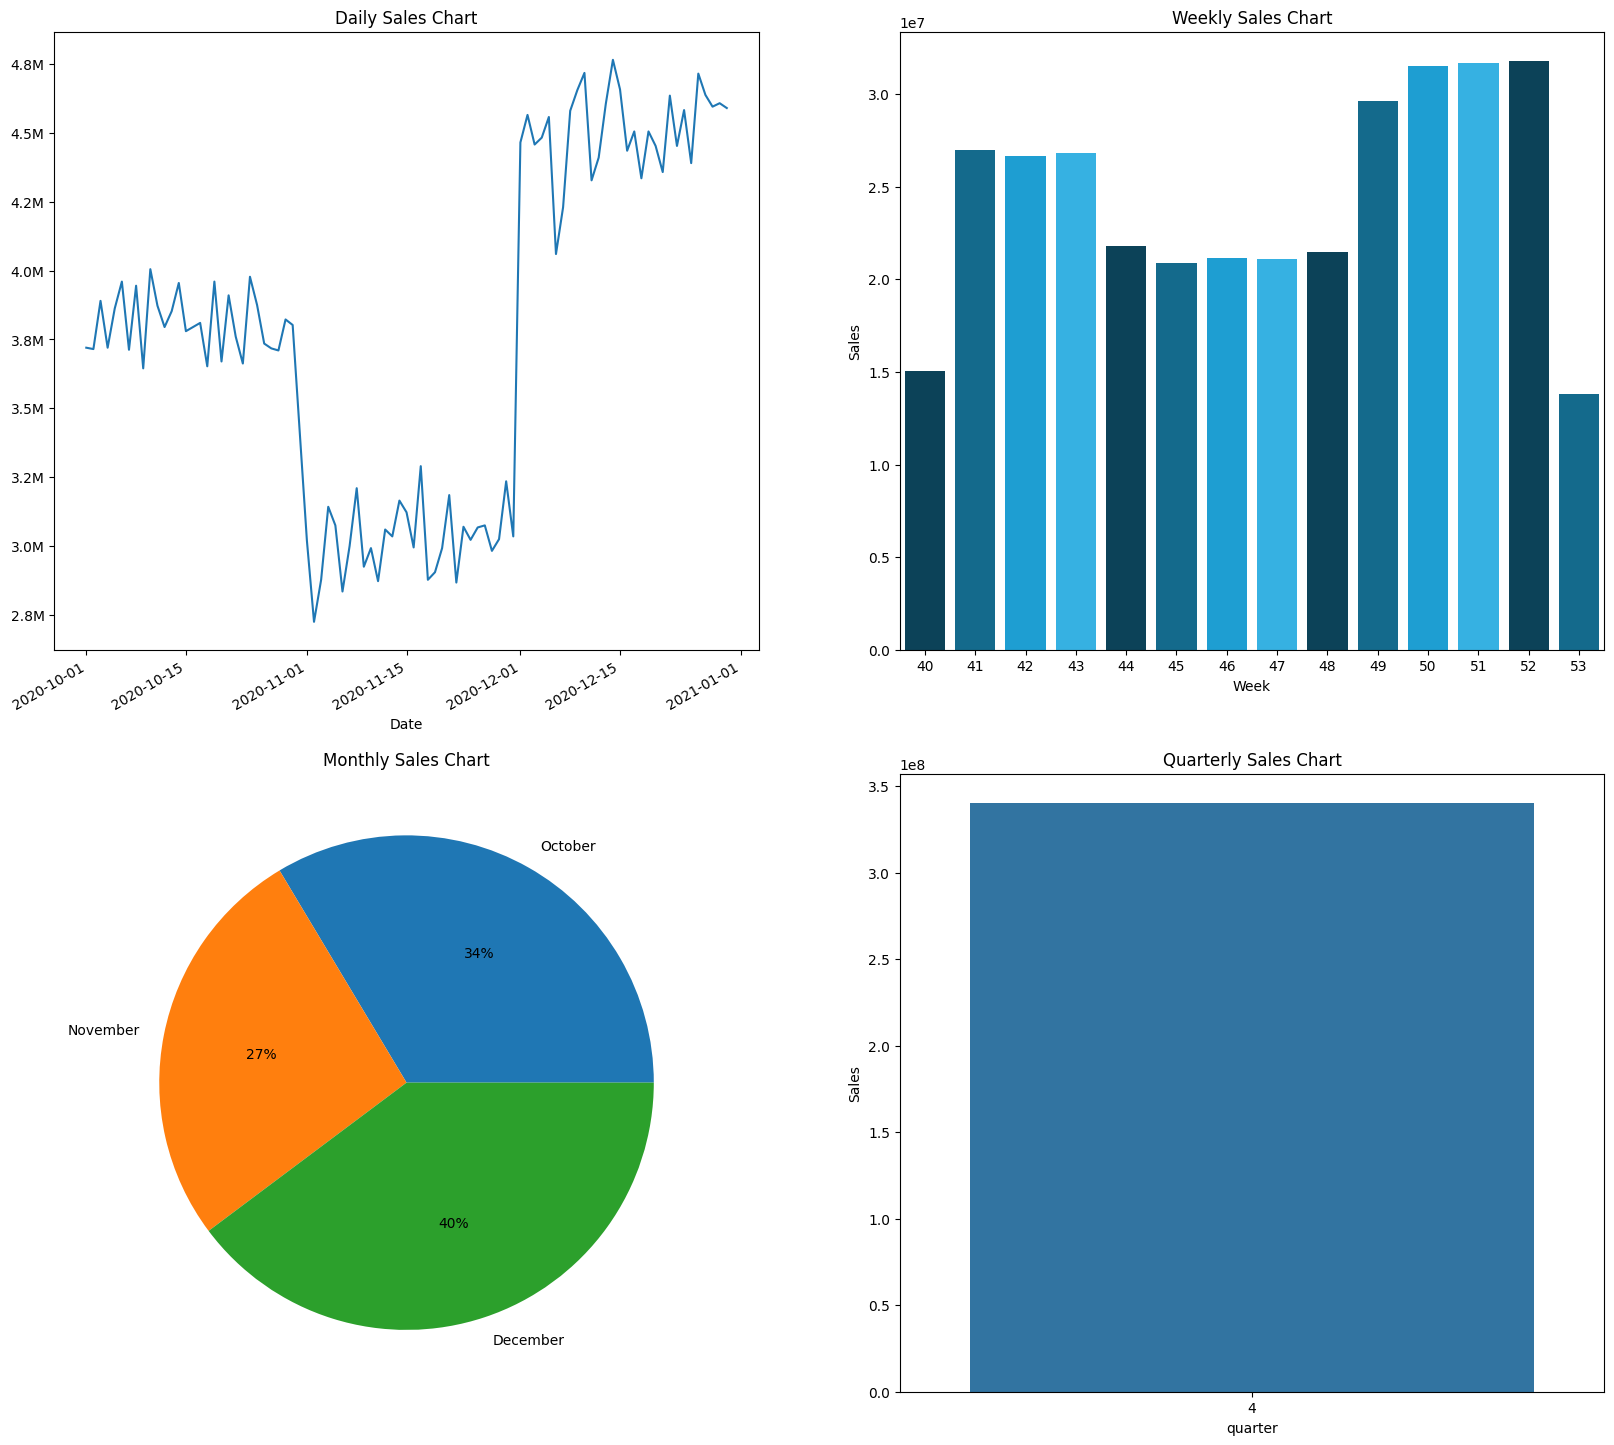

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title('Daily Sales Chart')
plt.gca().yaxis.set_major_formatter(format_number)
d1.plot()

plt.subplot(2, 2, 2)
plt.title('Weekly Sales Chart')
sns.barplot(y=w['Sales'],x=w['Week'],palette=c,errorbar = None)

plt.subplot(2, 2, 3)
plt.title('Monthly Sales Chart')
month_labels = ['October','November','December']
plt.pie(m['Sales'],autopct = '%1.0f%%',labels=month_labels)

plt.subplot(2, 2, 4)
plt.title('Quarterly Sales Chart')
sns.barplot(x=q['quarter'],y=q['Sales'])



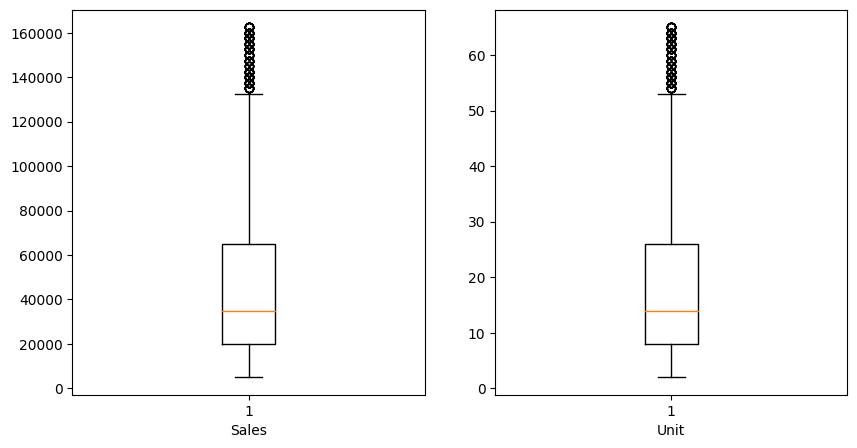

In [ ]:
# Box plot for the Sales and Unit
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data['Sales'])
plt.xlabel('Sales')

plt.subplot(1, 2, 2)
plt.boxplot(data['Unit'])
plt.xlabel('Unit')

plt.show()

**2: Include your recommendation, and indicate why you are choosing the recommended visualization package.**

I utilize both the Matplotlib and seaborn libraries for my project. Matplotlib is an open-source library that allows us to freely utilize its functionalities, enabling the creation of figures in various formats and interactive environments. On the other hand, seaborn is a Python data visualization package built on top of Matplotlib. It provides a powerful set of tools for generating visually appealing and informative statistical visuals. Additionally, we can leverage numpy to visualize the data as well.